<a href="https://colab.research.google.com/github/stephieseg/schoolwork/blob/master/MBD_SML_Section7_Tensorflow2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **MBD 2019-2020**
# **Statistical & Machine Learning Approaches for Marketing**

## **Section 7: Neural Networks - Implementing Neural Network with Tensorflow 2.x***

Reference:  
- TensorFlow 2 quickstart for beginners. Link: https://www.tensorflow.org/tutorials/quickstart/beginner

In [0]:
# Check Python version
import sys
print('Python version:', sys.version)

# Some important functions and libraries
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Check tensorflow version
%tensorflow_version 2.x
import tensorflow as tf
print('Tensorflow version:', tf.__version__)

Python version: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Tensorflow version: 2.2.0-rc1


**Load the MNIST data.**

In [0]:
# Load the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Get train, test data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Standardizeb

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Check the data shape
x_train.shape

(60000, 28, 28)

In [0]:
# Print out some data
x_train[0][:, 10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.36862745, 0.99215686, 0.99215686, 0.41960784,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09411765, 0.83529412, 0.99215686, 0.99215686, 0.51764706,
       0.        , 0.        , 0.        ])

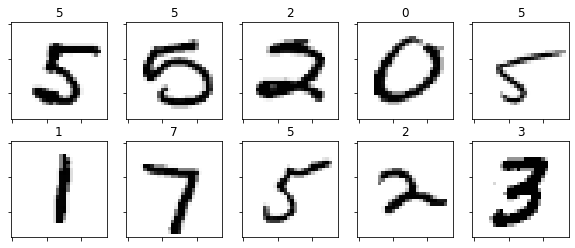

In [0]:
# Show some pictures
nrow = 2  # 2 rows
ncol = 5  # 5 plot per row
f, axarr = plt.subplots(nrow, ncol, figsize=(10, 4))  # Initiate the grid
for i in range(0, nrow):
  for j in range(0, ncol):
    rand_idx = random.randrange(x_train.shape[0])
    axarr[i, j].imshow(x_train[rand_idx], interpolation='nearest', cmap='Greys')
    #axarr[i, j].axis('off')
    axarr[i, j].set_xticklabels([])
    axarr[i, j].set_yticklabels([])
    axarr[i, j].set_title(y_train[rand_idx])
plt.show()

In [0]:
# Check class distribution
pd.Series(y_train).value_counts(normalize=True)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
dtype: float64

**Quickly build a neural network model using Tensorflow and Keras.**

In [0]:
# Simple NN model
# Note: this model is untrained
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flattern layer
  tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer
  tf.keras.layers.Dropout(0.2),  # Regularization
  tf.keras.layers.Dense(10)  # Output layer
])

In [0]:
# Show the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Make prediction and evaluation using the untrained.**

In [0]:
# Return prediction as a vector of "logits" or "log-odds" scores
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.9757446 , -0.13885774, -0.2583291 , -0.37166837,  0.29548502,
         0.44008955, -0.38646767, -0.2763179 , -0.06756284,  0.70808864]],
      dtype=float32)

In [0]:
# Return prediction as a vector of probability
tf.nn.softmax(predictions).numpy()

array([[0.03765873, 0.08696029, 0.07716765, 0.06889895, 0.13426217,
        0.15515102, 0.06788681, 0.0757919 , 0.09338648, 0.20283605]],
      dtype=float32)

**Train the neural network model.**

In [0]:
# Define the loss function (or error of the prediction)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

1.8633562

In [0]:
# Select the optimize
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [0]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.9131
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1458 - accuracy: 0.9557
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9759


In [0]:
# Evaluate the model with the loss function and the accuracy
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0776 - accuracy: 0.9753


[0.07759023457765579, 0.9753000140190125]

**Make the model predict probability.**

In [0]:
# Wrap the model by a softmax layer
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [0]:
# Make prediction
y_test_pred = probability_model(x_test)
y_test_pred = y_test_pred.numpy()
y_test_pred[:5]

array([[1.48124490e-08, 9.20189080e-09, 3.31582419e-06, 1.46412480e-04,
        7.64843831e-12, 9.59102309e-08, 2.06071469e-15, 9.99828100e-01,
        3.09416635e-07, 2.17287798e-05],
       [7.90654764e-10, 1.12666213e-03, 9.98870194e-01, 3.01200316e-06,
        3.85656567e-13, 1.00434953e-07, 6.64651356e-09, 4.17255336e-12,
        1.56267959e-08, 6.03186053e-14],
       [2.44948613e-08, 9.99285638e-01, 1.56816095e-05, 1.99841384e-06,
        1.39903677e-05, 1.53896178e-06, 1.39484428e-05, 5.08940779e-04,
        1.57713192e-04, 6.32792023e-07],
       [9.99966383e-01, 1.74530150e-08, 1.21492831e-05, 1.06954076e-07,
        2.36408880e-07, 5.60538547e-06, 1.36774825e-05, 1.11210977e-06,
        1.37039926e-08, 7.47846684e-07],
       [3.69868349e-06, 1.99989247e-10, 1.64053915e-06, 1.83154505e-08,
        9.98694718e-01, 2.68607153e-07, 3.57434004e-07, 3.05283465e-05,
        6.70964155e-08, 1.26874761e-03]], dtype=float32)